## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('../input/analyze-ab-test-results-notebook/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
print('Number of rows in the dataset is {}.'.format(df.shape[0]))

Number of rows in the dataset is 294478.


c. The number of unique users in the dataset.

In [5]:
print('Number of unique users in the dataset  {}.'.format(df.user_id.nunique()))

Number of unique users in the dataset  290584.


d. The proportion of users converted.

In [6]:
#round convert 0.119 to 0.12 
users_converted = round(df.converted.mean() * 100)
print('The proportion of users converted is {}%.'.format(users_converted))

The proportion of users converted is 12%.


e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
print("The number of times the new_page and treatment don't line up is: ")
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

The number of times the new_page and treatment don't line up is: 


3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<span style="color: blue;"> **Answer:** There is no Null values in the data

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.copy()
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) != False]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Number of unique users in the dataset is {}.'.format(df2.user_id.nunique()))


Number of unique users in the dataset is 290584.


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
print('The repeated user is: {} '.format(df2[df2.user_id.duplicated()].user_id.iloc[0]) )

The repeated user is: 773192 


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset=['user_id'], inplace =True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
print('probability of an individual converting regardless of the page they receive is: {:.2%}'.format(df2.converted.mean() ) )

probability of an individual converting regardless of the page they receive is: 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
prob = df2[df2.group == 'control'].converted.mean()
print('The probability of individual to converted while he/she in the control group  is {:.2%}'.format(prob))

The probability of individual to converted while he/she in the control group  is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
prob2 = df2[df2.group == 'treatment'].converted.mean()
print('The probability of individual to converted while he/she in the treatment group  is {:.2%}'.format(prob2))

The probability of individual to converted while he/she in the treatment group  is 11.88%


d. What is the probability that an individual received the new page?

In [18]:
prob3 = (df2.landing_page == 'new_page').mean()
print('The probability that an individual received the new page is {:.2%}'.format(prob3))

The probability that an individual received the new page is 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

 ### <span style="color: blue;">There is insufficient evidence to conclude that the new treatment page leads to more conversions because the conversion portion is nearly identical for the control and treatment pages, with the control page slightly higher in conversion than the treatment page.
The probability of receiving new pages for the two groups is also balanced.</span> 


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## **Ho: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 <= 0**

## **H1: 𝑝𝑛𝑒𝑤 - 𝑝𝑜𝑙𝑑 > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean()


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2.converted.mean()

c. What is $n_{new}$?

In [21]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])

new_page_converted.mean()

0.8807102057669809

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.8790354777868029

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

0.0016747279801779813

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs =[]

for i in range (10000):
    p_new1  = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1  = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    
    p_new2  = p_new1.mean()
    p_old2  = p_old1.mean()
    
    p_diffs.append(p_new2-p_old2)
   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

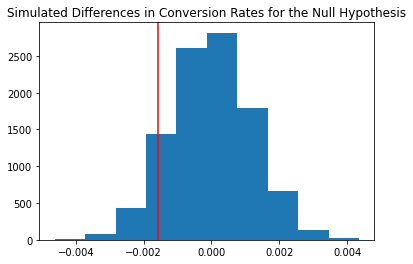

In [27]:
p_diffs = np.array(p_diffs)
# Actual observed differences in conversion, infered from ab_data.csv
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
plt.hist(p_diffs)
plt.title("Simulated Differences in Conversion Rates for the Null Hypothesis", fontsize=12)
plt.axvline(obs_diff, color='r');

#### additional just for using different method

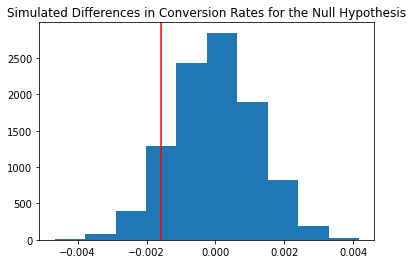

In [28]:
#use same method without for loop
p_diffs2 = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs2 = new_converted_simulation - old_converted_simulation

plt.hist(p_diffs2)
plt.title("Simulated Differences in Conversion Rates for the Null Hypothesis", fontsize=12)
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
#calculate the p-value
(obs_diff < p_diffs).mean()


0.9059

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* ###  <span style="color: blue;">  We calculated the p-value at point j; p-value = 0.904. (p-value: the probability of not observing any difference between convertion rates of control and treatment groups).
* ###  <span style="color: blue;">  To reject the null hypothesis, the p-value must be less than or equal to 0.05; however, in our case, the p-value exceeds the critical value (alpha) of 0.05, and thus we fail to reject the null hypothesis and we should keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" & converted == 1')['converted'].count()
convert_new = df2.query('group == "treatment" & converted == 1')['converted'].count()
n_old = df2.landing_page.value_counts()[1]
n_new = df2.landing_page.value_counts()[0]

convert_old, convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

### <span style="color: blue;"> The z-score is a measure of standard deviations from the mean and used to calculate the p-value also; in our case, the z-score is -1.31, which is not significantly different from the mean, and the p-value is 0.905, which is almost identical to the p-value computed in the preceding 'j'; it also indicates that we fail to reject the null hypothesis because the p-value is greater than alpha (0.05), we don't have evedince to see that the new page leads to more conversions, so we should keep the old page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### <span style="color: blue;">  Because the output is binary , Logistic regression should be used, we will use different hypothesis  for this section: 
## <span style="color: blue;"> H0: pnew−pold=0
## <span style="color: blue;">  H1: pnew−pold≠0 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = log_model.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        23:10:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

### <span style="color: blue;">The p-value calculated here is 0.190, which differs from the p-value calculated in j and k because the difference between the hypothesis, in this case the alternative hypothesis, in two directions (Logit Regression being a two-tailed test); whether the new page has positive or negative affect, but the p-value founded also can't reject the null hypothesis because it's greater than type1 error 0.05, so the old page should be kept.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

### <span style="color: blue;"> Adding more information about users, such as gender, age, and nationality, may be advantageous but will raise the multi-linear problem or Simpson's paradox.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('/kaggle/input/ab-testing-e-commerce-website/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
#to now which countries in our data.
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
### Create the necessary dummy variables
df_new[['CA','UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.drop('country', axis =1, inplace =True)


In [42]:
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [43]:
### Fit Your Linear Model And Obtain the Results


log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
result = log_mod.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:               1.521e-05
Time:                        23:33:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

### <span style="color: blue;"> The above model includes only the customer's country as an explanatory variable, but based on p-value, there is no relationship between user's country and conversion rate as the p-value greater than 0.05

In [47]:
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA']])
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:               2.323e-05
Time:                        00:06:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

### <span style="color: blue;"> in above cell we fit model with ab_page to see if there is significant effect to conversion rate, but based on p-value (0.191), we can't prove that the new page leads to more conversion 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_CA'] = df_new['ab_page'] * df_new['CA']

In [49]:
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,ab_UK,ab_CA
user_id,,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [50]:
#without ab_page
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA', 'ab_UK', 'ab_CA']])
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:               2.417e-05
Time:                        00:20:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK             0.0045      0.018      0.257      0.797      -0.030       0.039
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
ab_UK          0.0108      0.023      0.475      0.635      -0.034       0.056
ab_CA         -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

In [51]:
# add ab_page
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'CA', 'ab_UK', 'ab_CA']])
results = log_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Dec 2022   Pseudo R-squ.:               3.482e-05
Time:                        00:21:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

#### <span style="color: blue;"> In this project, we conducted an A/B test to determine whether we should keep the old page or switch to the new page, and we discovered that there is no evidence to switch to the new page. We tested across countries of users and ab page, and none of these factors significantly affected the conversion rate, so we should keep the old page based on the statistical tests we conducted. 
